# Visualization from nc file

In [1]:
import xarray as xr
import matplotlib.pyplot as plt


## Read file

In [2]:
data100 = xr.open_dataset("../SGDoptimized_init_input1_2020-01-01_3_days_window_100.nc")
data1000 = xr.open_dataset("../SGDoptimized_init_input1_2020-01-01_3_days_window_1000.nc")
datamasked100 = xr.open_dataset("../SGDoptimized_init_input1_2020-01-01_3_days_window_masked_100.nc")
datamasked1000 = xr.open_dataset("../SGDoptimized_init_input1_2020-01-01_3_days_window_masked_1000.nc")

# validation = xr.open_dataset("../Validation_1_2020-01-01_3_days_window.nc")
test = xr.open_dataset("../TestDataSet_test.nc")
vali = xr.open_dataset("../Validation_1_2020-01-01_1_days_window.nc")

In [3]:
data100

<xarray.Dataset> Size: 39MB
Dimensions:  (time: 2, lat: 672, lon: 1440, channel: 5)
Coordinates:
  * time     (time) datetime64[ns] 16B 2020-01-01 2020-01-02
  * lat      (lat) float64 5kB -78.0 -77.75 -77.5 -77.25 ... 89.25 89.5 89.75
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * channel  (channel) int64 40B 0 1 2 3 4
Data variables:
    data     (time, channel, lat, lon) float32 39MB ...
Attributes:
    description:  Optimized initial condition (destandardized)

In [4]:
test

<xarray.Dataset> Size: 19MB
Dimensions:  (lat: 672, lon: 1440, channel: 5)
Coordinates:
  * lat      (lat) float64 5kB -78.0 -77.75 -77.5 -77.25 ... 89.25 89.5 89.75
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * channel  (channel) int64 40B 0 1 2 3 4
Data variables:
    data     (channel, lat, lon) float32 19MB ...

In [5]:
vali

<xarray.Dataset> Size: 58MB
Dimensions:     (lat: 672, lon: 1440, channel: 5, validation: 3)
Coordinates:
    time        datetime64[ns] 8B ...
  * lat         (lat) float64 5kB -78.0 -77.75 -77.5 -77.25 ... 89.25 89.5 89.75
  * lon         (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * channel     (channel) int64 40B 0 1 2 3 4
  * validation  (validation) <U18 216B 'target' ... 'optimized_forecast'
Data variables:
    data        (validation, channel, lat, lon) float32 58MB ...

## Variables

In [6]:
state = 'zos'
# state = 'thetao'
# state = 'so'
# state = 'uo'
# state = 'vo'

# If the state is 'thetao' or 'so' or 'uo or 'vo', Choose depth between 0 ~ 20.
depth_index = 0

# Time index fix as 1 
time_index = 1

In [7]:
match state :
    case "zos" :
        cmap_param = "seismic"
        ch_idx = 0
    case "thetao" :
        cmap_param = "viridis"
        ch_idx = 1
    case "so" :
        cmap_param = "jet"
        ch_idx = 2
    case "uo" :
        cmap_param = "coolwarm"
        ch_idx = 3
    case "vo" :
        cmap_param = "coolwarm"
        ch_idx = 4

## Global view

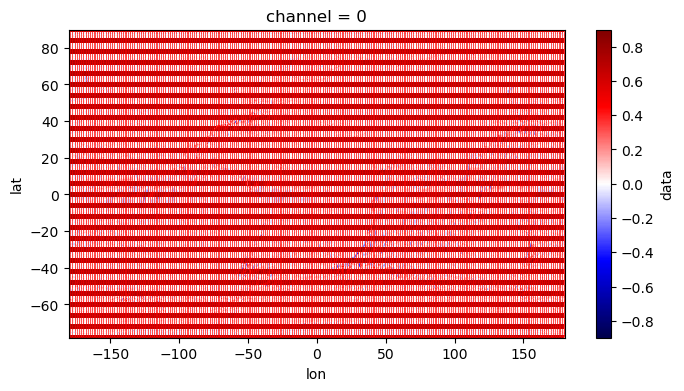

In [8]:
plt.figure(figsize=(8,4))

window = test.isel(channel=0, time=1, missing_dims='ignore')
window.data.plot(cmap=cmap_param)


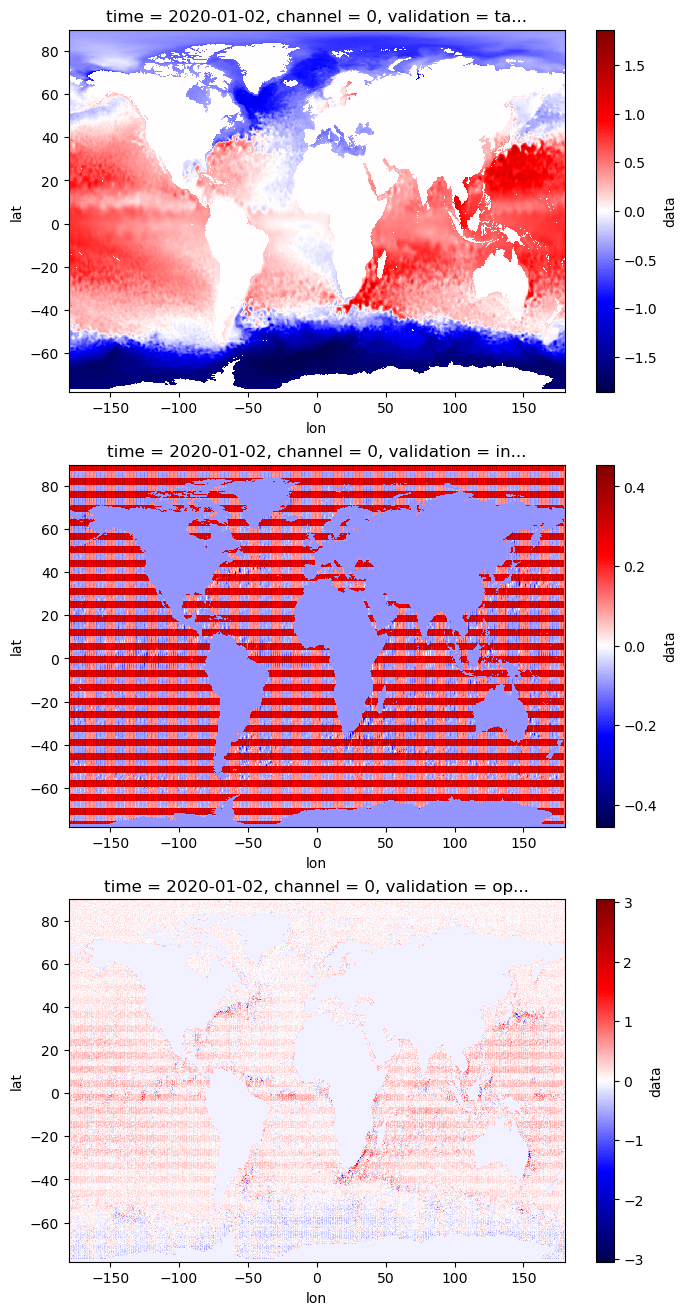

In [9]:
plt.figure(figsize=(8, 16))

plt.subplot(3, 1, 1)
# (missing_dims = 'ignore') parameter allow us to simplify the code by igonoring depth coordinate at 'zos' variable.
forecast_window = vali.isel(depth=depth_index, channel=ch_idx, time=time_index, validation=0, missing_dims='ignore')
forecast_window.data.plot(cmap=cmap_param)

plt.subplot(3, 1, 2)
forecast_window = vali.isel(depth=depth_index, channel=ch_idx, time=time_index, validation=1, missing_dims='ignore')
forecast_window.data.plot(cmap=cmap_param)

plt.subplot(3, 1, 3)
forecast_window = vali.isel(depth=depth_index, channel=ch_idx, time=time_index, validation=2, missing_dims='ignore')
forecast_window.data.plot(cmap=cmap_param)



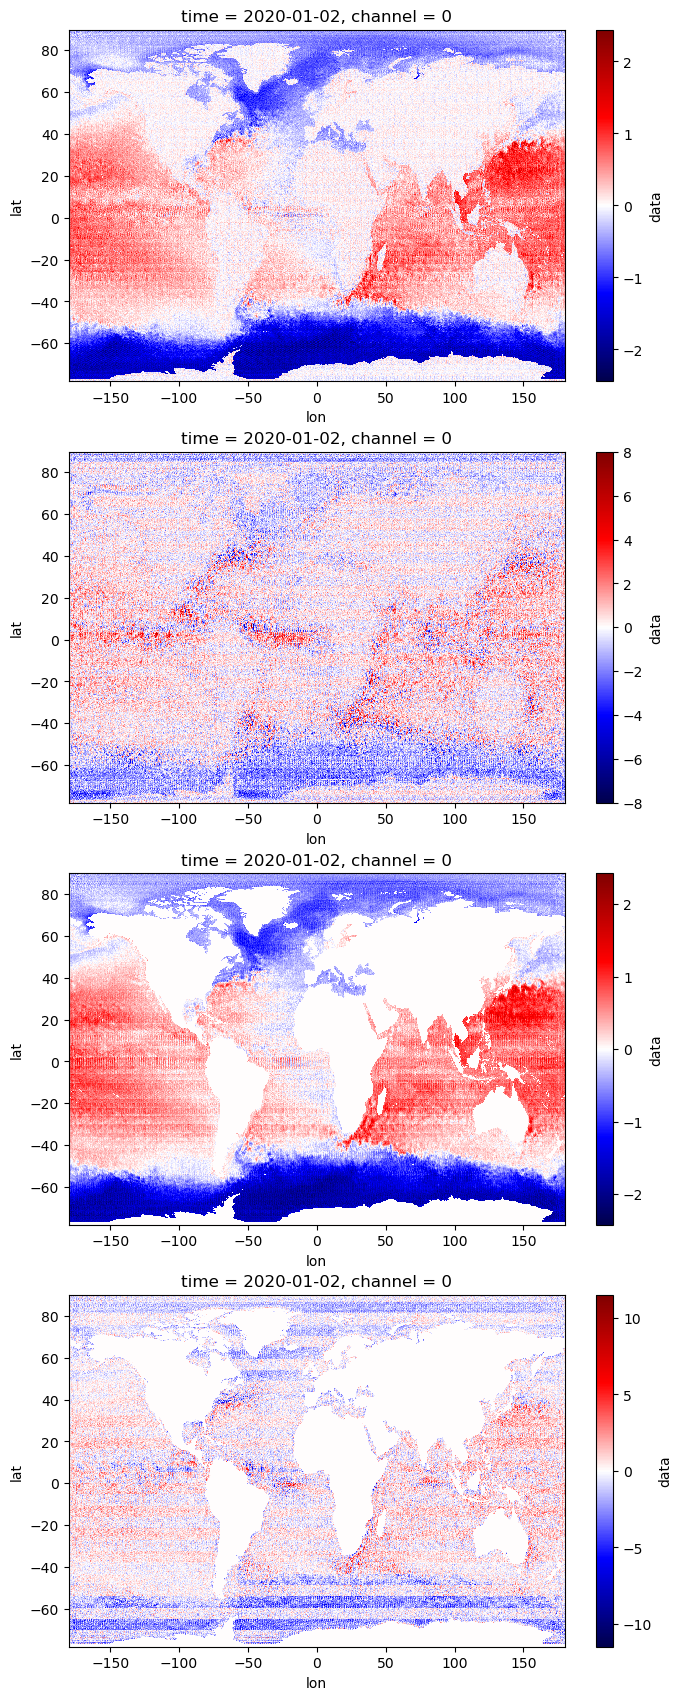

In [10]:
plt.figure(figsize=(8, 21))
 
plt.subplot(4, 1, 1)
# (missing_dims = 'ignore') parameter allow us to simplify the code by igonoring depth coordinate at 'zos' variable.
forecast_window = data100.isel(depth=depth_index, channel=ch_idx, time=time_index, missing_dims='ignore')
forecast_window.data.plot(cmap=cmap_param)

plt.subplot(4, 1, 2)
forecast_window = data1000.isel(depth=depth_index, channel=ch_idx, time=time_index, missing_dims='ignore')
forecast_window.data.plot(cmap=cmap_param)

plt.subplot(4, 1, 3)
forecast_window = datamasked100.isel(depth=depth_index, channel=ch_idx, time=time_index, missing_dims='ignore')
forecast_window.data.plot(cmap=cmap_param)

plt.subplot(4, 1, 4)
forecast_window = datamasked1000.isel(depth=depth_index, channel=ch_idx, time=time_index, missing_dims='ignore')
forecast_window.data.plot(cmap=cmap_param)


## Zoom in 

In [ ]:
from xarray import Dataset

def defineZone(inputnc) -> Dataset :
    lat_min1, lat_max1, lat_min2, lat_max2, lat_min3, lat_max3 = -40, -20, 30 , 50, 20, 40
    lon_min1, lon_max1, lon_min2, lon_max2, lon_min3, lon_max3 = 0, 70, -80, -10, 100, 170
    arr = []
    arr.append(inputnc.sel(latitude=slice(lat_min1, lat_max1), longitude=slice(lon_min1, lon_max1))) # Agulhas
    arr.append(inputnc.sel(latitude=slice(lat_min2, lat_max2), longitude=slice(lon_min2, lon_max2))) # Gulf Stream
    arr.append(inputnc.sel(latitude=slice(lat_min3, lat_max3), longitude=slice(lon_min3, lon_max3))) # Kuroshio

    
    return arr